In [2]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import scipy as sp
from plot_pca import plot_pca

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
mice = ['4139219.2', '4139219.3', '4139224.2', '4139224.3', '4139224.5',
     '4139251.1','4139251.2','4139260.1','4139260.2','4139261.2','4139266.3','4139265.4',
     '4139265.3','4139265.5']
df = pp.load_session_db()
df = df[df['RewardCount']>20]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]




G:\My Drive\VR_Data\TwoTower\behavior.sqlite


In [4]:
mouse =mice[0]
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse


,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
616,4139219.2,08_10_2018,1,TwoTower_noTimeout,63,1,CA1,2018-10-08,G:\My Drive\VR_Data\TwoTower\4139219.2\08_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\08_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\08_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\08_10_2...
618,4139219.2,08_10_2018,3,TwoTower_noTimeout,29,1,CA1,2018-10-08,G:\My Drive\VR_Data\TwoTower\4139219.2\08_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\08_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\08_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\08_10_2...
651,4139219.2,10_10_2018,2,TwoTower_noTimeout,86,1,CA1,2018-10-10,G:\My Drive\VR_Data\TwoTower\4139219.2\10_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\10_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\10_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\10_10_2...
689,4139219.2,12_10_2018,1,TwoTower_Timeout,54,1,CA1,2018-10-12,G:\My Drive\VR_Data\TwoTower\4139219.2\12_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\12_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\12_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\12_10_2...
735,4139219.2,15_10_2018,2,TwoTower_Timeout,54,1,CA1,2018-10-15,G:\My Drive\VR_Data\TwoTower\4139219.2\15_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\15_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\15_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\15_10_2...
780,4139219.2,17_10_2018,6,TwoTower_Timeout,53,1,CA1,2018-10-17,G:\My Drive\VR_Data\TwoTower\4139219.2\17_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\17_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\17_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\17_10_2...
818,4139219.2,19_10_2018,1,TwoTower_Timeout,38,1,CA1,2018-10-19,G:\My Drive\VR_Data\TwoTower\4139219.2\19_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\19_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\19_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\19_10_2...
820,4139219.2,19_10_2018,3,TwoTower_Timeout,47,1,CA1,2018-10-19,G:\My Drive\VR_Data\TwoTower\4139219.2\19_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\19_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\19_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\19_10_2...
835,4139219.2,20_10_2018,3,TwoTower_Timeout,52,1,CA1,2018-10-20,G:\My Drive\VR_Data\TwoTower\4139219.2\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\20_10_2...
853,4139219.2,22_10_2018,2,TwoTower_Timeout,51,1,CA1,2018-10-22,G:\My Drive\VR_Data\TwoTower\4139219.2\22_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\22_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\22_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\22_10_2...


In [20]:
sess = df_mouse.iloc[6]
sess

MouseName                                                4139219.2
DateFolder                                              19_10_2018
SessionNumber                                                    1
Track                                             TwoTower_Timeout
RewardCount                                                     38
Imaging                                                          1
ImagingRegion                                                  CA1
DateTime                                       2018-10-19 00:00:00
data file        G:\My Drive\VR_Data\TwoTower\4139219.2\19_10_2...
scanfile         G:\My Drive\2P_Data\TwoTower\4139219.2\19_10_2...
scanmat          G:\My Drive\2P_Data\TwoTower\4139219.2\19_10_2...
s2pfolder        G:\My Drive\2P_Data\TwoTower\4139219.2\19_10_2...
Name: 818, dtype: object

In [21]:

VRDat,C, S, A = pp.load_scan_sess(sess,fneu_coeff=.7,analysis='s2p')
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
pcnt = np.zeros([VRDat.shape[0],])
for i,(start,stop) in enumerate(zip(tstart_inds,teleport_inds)):
    pcnt[start:stop] = int(trial_info['rewards'][i]>0)

S = sp.ndimage.filters.gaussian_filter1d(S,10.,axis=0)

num aberrant ttls 0.0


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:279: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:278: RuntimeWarning: Mean of empty slice
  zone0_speed[i]=np.nanmean(sub_frame.loc[zone0_mask,'speed'])


(23163, 1967)
(23163,)
(3403,) (3403, 1967)


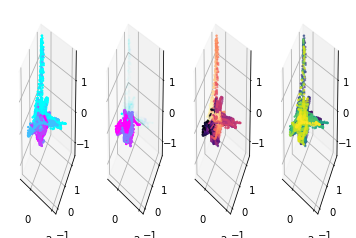

In [31]:

f,ax = plot_pca(S,VRDat,pcnt,plot_err=True)

In [23]:
sum(pcnt)

13383.0

In [24]:
pcnt.shape

(23163,)